# Bakery Dataset
In this project, I performed an in-depth analysis of a bakery’s sales data, focusing on data cleaning, exploratory analysis, clustering, and building a recommendation system. My approach utilized a range of data manipulation, visualization, and machine learning techniques, highlighting my skills in data wrangling, feature engineering, and clustering analysis.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [5]:
bakery_df = pd.read_csv("/Users/saqib/Downloads/archive 2/Bakery.csv")

In [7]:
bakery_df.head()


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


## Cleaned the column names to make them more accesable and readable


In [180]:
bakery_df= bakery_df.rename(columns={"Items": "Item", "TransactionNo": "Transaction", "DateTime": "date_time", "Daypart":  "period_day", "DayType": "weekday_weekend"})

In [11]:
bakery_df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


## Lower cased  the column values to make them more accesable and readable

In [13]:
bakery_df["period_day"] = bakery_df["period_day"].str.lower()

In [15]:
bakery_df["weekday_weekend"] = bakery_df["weekday_weekend"].str.lower()

In [17]:
bakery_df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:11,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:34,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:34,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:57,morning,weekend
4,3,Jam,2016-10-30 10:07:57,morning,weekend


### changed the date time format 


In [182]:
bakery_df["date_time"] = pd.to_datetime(bakery_df["date_time"]).dt.strftime('%m/%d/%Y %-I:%M')

### Checking for the null values if any.


In [21]:
bakery_df.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

### Checked for duplicates and removed them if found.


In [23]:
bakery_df.duplicated().sum()

1620

In [25]:
duplicated_rows = bakery_df[bakery_df.duplicated(keep=False)]

In [27]:
duplicated_rows

,Transaction,Item,date_time,period_day,weekday_weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
2,2,Scandinavian,10/30/2016 10:05,morning,weekend
23,11,Bread,10/30/2016 10:27,morning,weekend
25,11,Bread,10/30/2016 10:27,morning,weekend
48,21,Coffee,10/30/2016 10:49,morning,weekend
...,...,...,...,...,...
20423,9634,Coffee,08/04/2017 4:30,afternoon,weekend
20464,9664,Coffee,09/04/2017 11:40,morning,weekend
20465,9664,Coffee,09/04/2017 11:40,morning,weekend
20472,9667,Sandwich,09/04/2017 12:04,afternoon,weekend


In [29]:
bakery_df_cleaned = bakery_df.drop_duplicates()

In [31]:
bakery_df_cleaned.duplicated().sum()

0

In [33]:
bakery_df_cleaned.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
3,3,Hot chocolate,10/30/2016 10:07,morning,weekend
4,3,Jam,10/30/2016 10:07,morning,weekend
5,3,Cookies,10/30/2016 10:07,morning,weekend


### Reseting the index to make dataframe uniform and accesable


In [35]:
bakery_df_cleaned= bakery_df_cleaned.reset_index(drop=True)

In [37]:
bakery_df_cleaned.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
2,3,Hot chocolate,10/30/2016 10:07,morning,weekend
3,3,Jam,10/30/2016 10:07,morning,weekend
4,3,Cookies,10/30/2016 10:07,morning,weekend


### Analyzing the time of day to determine which period was the busiest for the restaurant in terms of sales


In [39]:
bakery_df_cleaned["period_day"].value_counts()

afternoon    10687
morning       7697
evening        490
night           13
Name: period_day, dtype: int64

### Analyzing the weekend / weekday to determine whether the weekend or weekday  was the busiest for the restaurant in terms of sales


In [41]:
bakery_df_cleaned["weekday_weekend"].value_counts()

weekday    11830
weekend     7057
Name: weekday_weekend, dtype: int64

### Which items were sold most in terms of quantity.


In [43]:
bakery_df_cleaned["Item"].value_counts()

Coffee            4528
Bread             3097
Tea               1350
Cake               983
Pastry             815
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Item, Length: 94, dtype: int64

## Normalize products and get a dataframe with products and product_id 


In [45]:
products = pd.DataFrame({"product_id": range(1, len(bakery_df_cleaned["Item"].unique()) + 1),
                                            "product_name": bakery_df_cleaned["Item"].unique()})

In [47]:
products.head()

,product_id,product_name
0,1,Bread
1,2,Scandinavian
2,3,Hot chocolate
3,4,Jam
4,5,Cookies


In [49]:
bakery_df_cleaned = bakery_df_cleaned.merge(products, left_on="Item", right_on="product_name", how="left")

In [51]:
bakery_df_cleaned = bakery_df_cleaned[["Transaction", "product_id", "date_time", "period_day", "weekday_weekend"]]

In [53]:
bakery_df_cleaned

,Transaction,product_id,date_time,period_day,weekday_weekend
0,1,1,10/30/2016 9:58,morning,weekend
1,2,2,10/30/2016 10:05,morning,weekend
2,3,3,10/30/2016 10:07,morning,weekend
3,3,4,10/30/2016 10:07,morning,weekend
4,3,5,10/30/2016 10:07,morning,weekend
...,...,...,...,...,...
18882,9682,7,09/04/2017 2:32,afternoon,weekend
18883,9682,10,09/04/2017 2:32,afternoon,weekend
18884,9683,7,09/04/2017 2:57,afternoon,weekend
18885,9683,8,09/04/2017 2:57,afternoon,weekend


## Label Encoding our dataframe to check for any corelations among the columns.


In [55]:
bakery_df_copy = bakery_df_cleaned.copy()


In [57]:
bakery_df_copy["period_encoded"] = bakery_df_copy["period_day"].astype("category").cat.codes
bakery_df_copy["weekend_weekday_encoded"] = bakery_df_copy["weekday_weekend"].astype("category").cat.codes

In [59]:
bakery_encoded = pd.get_dummies(bakery_df_copy, columns=["period_day", "weekday_weekend"])

In [61]:
bakery_df_copy.head()

,Transaction,product_id,date_time,period_day,weekday_weekend,period_encoded,weekend_weekday_encoded
0,1,1,10/30/2016 9:58,morning,weekend,2,1
1,2,2,10/30/2016 10:05,morning,weekend,2,1
2,3,3,10/30/2016 10:07,morning,weekend,2,1
3,3,4,10/30/2016 10:07,morning,weekend,2,1
4,3,5,10/30/2016 10:07,morning,weekend,2,1


In [63]:
bakery_encoded.head()

,Transaction,product_id,date_time,period_encoded,weekend_weekday_encoded,period_day_afternoon,period_day_evening,period_day_morning,period_day_night,weekday_weekend_weekday,weekday_weekend_weekend
0,1,1,10/30/2016 9:58,2,1,0,0,1,0,0,1
1,2,2,10/30/2016 10:05,2,1,0,0,1,0,0,1
2,3,3,10/30/2016 10:07,2,1,0,0,1,0,0,1
3,3,4,10/30/2016 10:07,2,1,0,0,1,0,0,1
4,3,5,10/30/2016 10:07,2,1,0,0,1,0,0,1


In [65]:
bakery_df_copy.mean(numeric_only=True)

Transaction                4951.051517
product_id                   16.610049
period_encoded                0.843067
weekend_weekday_encoded       0.373643
dtype: float64

In [67]:
bakery_encoded.mean(numeric_only=True)

Transaction                4951.051517
product_id                   16.610049
period_encoded                0.843067
weekend_weekday_encoded       0.373643
period_day_afternoon          0.565839
period_day_evening            0.025944
period_day_morning            0.407529
period_day_night              0.000688
weekday_weekend_weekday       0.626357
weekday_weekend_weekend       0.373643
dtype: float64

In [69]:
mean_values = bakery_encoded.mean(numeric_only=True)
median_values = bakery_encoded.median(numeric_only=True)
mode_values = bakery_encoded.mode(numeric_only=True)

#print the results:
print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)

Mean:
 Transaction                4951.051517
product_id                   16.610049
period_encoded                0.843067
weekend_weekday_encoded       0.373643
period_day_afternoon          0.565839
period_day_evening            0.025944
period_day_morning            0.407529
period_day_night              0.000688
weekday_weekend_weekday       0.626357
weekday_weekend_weekend       0.373643
dtype: float64
Median:
 Transaction                5082.0
product_id                    7.0
period_encoded                0.0
weekend_weekday_encoded       0.0
period_day_afternoon          1.0
period_day_evening            0.0
period_day_morning            0.0
period_day_night              0.0
weekday_weekend_weekday       1.0
weekday_weekend_weekend       0.0
dtype: float64
Mode:
    Transaction  product_id  period_encoded  weekend_weekday_encoded  \
0         9447           7               0                        0   

   period_day_afternoon  period_day_evening  period_day_morning  \
0      

## Dispersion of data


In [71]:
variance = bakery_encoded.var(numeric_only=True)
variance

Transaction                7.905203e+06
product_id                 3.760899e+02
period_encoded             9.515434e-01
weekend_weekday_encoded    2.340464e-01
period_day_afternoon       2.456782e-01
period_day_evening         2.527203e-02
period_day_morning         2.414619e-01
period_day_night           6.878668e-04
weekday_weekend_weekday    2.340464e-01
weekday_weekend_weekend    2.340464e-01
dtype: float64

In [73]:
std_deviation = bakery_encoded.std(numeric_only=True)
std_deviation

Transaction                2811.619306
product_id                   19.393036
period_encoded                0.975471
weekend_weekday_encoded       0.483783
period_day_afternoon          0.495659
period_day_evening            0.158972
period_day_morning            0.491388
period_day_night              0.026227
weekday_weekend_weekday       0.483783
weekday_weekend_weekend       0.483783
dtype: float64

In [75]:
bakery_encoded.describe()

,Transaction,product_id,period_encoded,weekend_weekday_encoded,period_day_afternoon,period_day_evening,period_day_morning,period_day_night,weekday_weekend_weekday,weekday_weekend_weekend
count,18887.000000,18887.000000,18887.000000,18887.000000,18887.000000,18887.000000,18887.000000,18887.000000,18887.000000,18887.000000
mean,4951.051517,16.610049,0.843067,0.373643,0.565839,0.025944,0.407529,0.000688,0.626357,0.373643
std,2811.619306,19.393036,0.975471,0.483783,0.495659,0.158972,0.491388,0.026227,0.483783,0.483783
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2496.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5082.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7378.500000,24.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,9684.000000,94.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ## Visualising the period of day in which most items were sold.

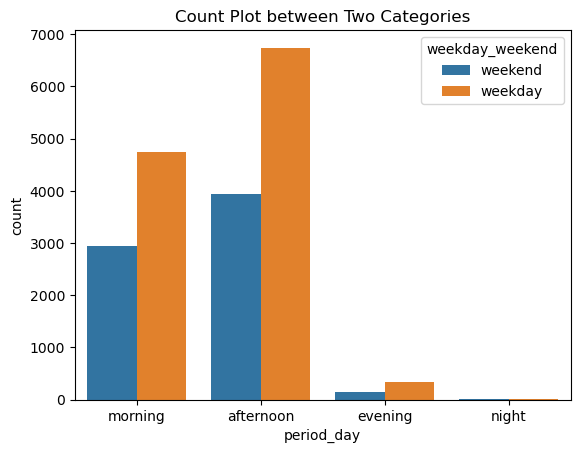

In [77]:
sns.countplot(x='period_day', hue='weekday_weekend', data=bakery_df_cleaned)

plt.title('Count Plot between Two Categories')
plt.show()

## Box-Plotting the period of day over week-day/ week-end to find the outliers

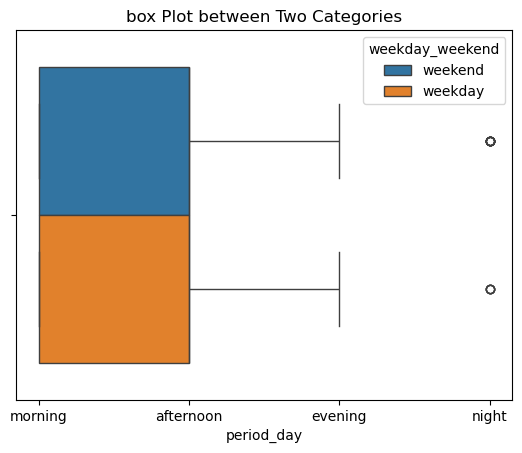

In [79]:

sns.boxplot(x='period_day', hue='weekday_weekend', data=bakery_df_cleaned)

plt.title('box Plot between Two Categories')
plt.show()

In [81]:
bakery_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18887 entries, 0 to 18886
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      18887 non-null  int64 
 1   product_id       18887 non-null  int64 
 2   date_time        18887 non-null  object
 3   period_day       18887 non-null  object
 4   weekday_weekend  18887 non-null  object
dtypes: int64(2), object(3)
memory usage: 885.3+ KB


 ## changing the datatype of some columns,  so that they wouldn't raise any error while plotting them

In [85]:
bakery_df_cleaned["period_day"] = bakery_df_cleaned["period_day"].astype(str)

In [87]:
bakery_df_cleaned["weekday_weekend"] = bakery_df_cleaned["weekday_weekend"].astype(str)

In [89]:
bakery_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18887 entries, 0 to 18886
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      18887 non-null  int64 
 1   product_id       18887 non-null  int64 
 2   date_time        18887 non-null  object
 3   period_day       18887 non-null  object
 4   weekday_weekend  18887 non-null  object
dtypes: int64(2), object(3)
memory usage: 885.3+ KB


## checking for any visual correlation between period_day and weekday_weekend

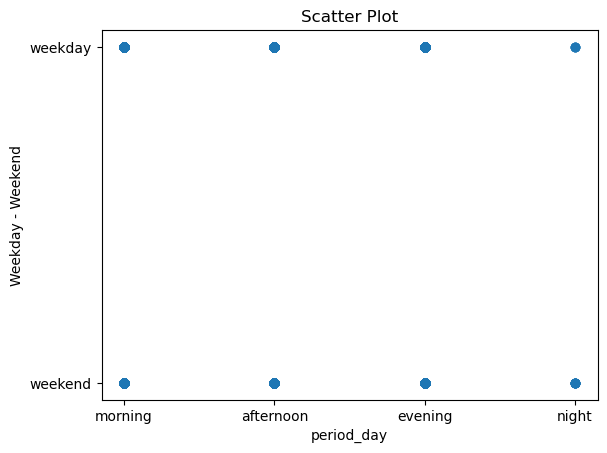

In [91]:
x = bakery_df_cleaned['period_day']  
y = bakery_df_cleaned['weekday_weekend']  

plt.scatter(x, y)
plt.title('Scatter Plot')
plt.xlabel('period_day')
plt.ylabel('Weekday - Weekend')
plt.show()

In [174]:
pearson_corr = np.corrcoef(bakery_encoded['weekend_weekday_encoded'], bakery_encoded['period_encoded'])[0, 1]
print(f'Pearson correlation between weekday_weekend and period of day: {pearson_corr}')

Pearson correlation between weekday_weekend and period of day: 0.014527560509050437


## That means there is Weak positive correlation between weekend/weekday and period

In [96]:
bakery_encoded.head()

,Transaction,product_id,date_time,period_encoded,weekend_weekday_encoded,period_day_afternoon,period_day_evening,period_day_morning,period_day_night,weekday_weekend_weekday,weekday_weekend_weekend
0,1,1,10/30/2016 9:58,2,1,0,0,1,0,0,1
1,2,2,10/30/2016 10:05,2,1,0,0,1,0,0,1
2,3,3,10/30/2016 10:07,2,1,0,0,1,0,0,1
3,3,4,10/30/2016 10:07,2,1,0,0,1,0,0,1
4,3,5,10/30/2016 10:07,2,1,0,0,1,0,0,1


In [98]:
bakery_df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
2,2,Scandinavian,10/30/2016 10:05,morning,weekend
3,3,Hot chocolate,10/30/2016 10:07,morning,weekend
4,3,Jam,10/30/2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09/04/2017 2:32,afternoon,weekend
20503,9682,Tea,09/04/2017 2:32,afternoon,weekend
20504,9683,Coffee,09/04/2017 2:57,afternoon,weekend
20505,9683,Pastry,09/04/2017 2:57,afternoon,weekend


## Checking for the purchase frequency of products.

In [100]:
purchase_frequency= bakery_df.groupby(["Transaction"]).size().reset_index(name="purchase_count")
print(purchase_frequency)

      Transaction  purchase_count
0               1               1
1               2               2
2               3               3
3               4               1
4               5               3
...           ...             ...
9460         9680               1
9461         9681               4
9462         9682               4
9463         9683               2
9464         9684               1

[9465 rows x 2 columns]


In [102]:
purchase_counts = bakery_df["Item"].value_counts()
top_20_purchases = purchase_counts.head(30)

## Visualizing the purchase frequency to see the bigger picture

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_54743/1934954801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_purchases.values, y=top_20_purchases.index, palette='viridis')


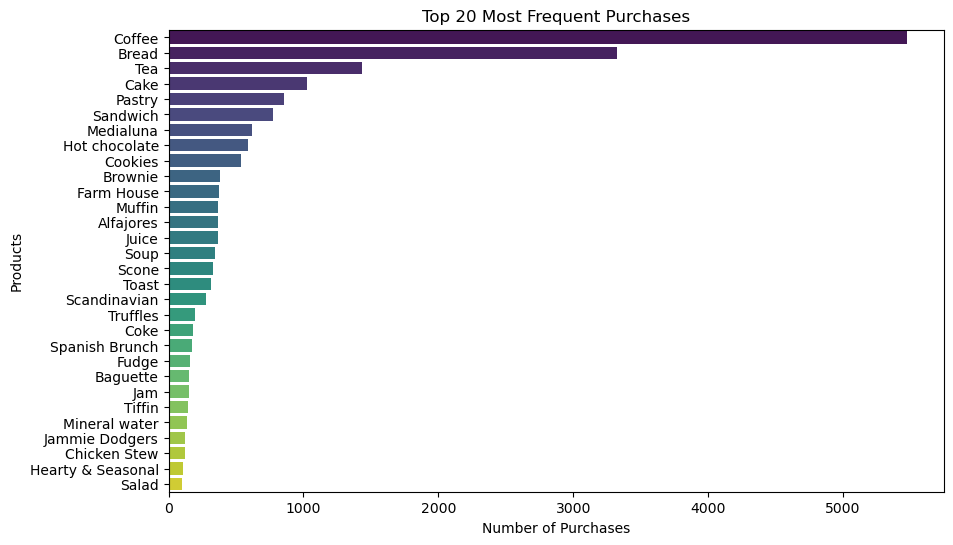

In [106]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_20_purchases.values, y=top_20_purchases.index, palette='viridis')
plt.title('Top 20 Most Frequent Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Products')
plt.show()

In [104]:
top_20_purchases

Coffee               5471
Bread                3325
Tea                  1435
Cake                 1025
Pastry                856
Sandwich              771
Medialuna             616
Hot chocolate         590
Cookies               540
Brownie               379
Farm House            374
Muffin                370
Alfajores             369
Juice                 369
Soup                  342
Scone                 327
Toast                 318
Scandinavian          277
Truffles              193
Coke                  185
Spanish Brunch        172
Fudge                 159
Baguette              152
Jam                   149
Tiffin                146
Mineral water         136
Jammie Dodgers        125
Chicken Stew          123
Hearty & Seasonal     107
Salad                  99
Name: Item, dtype: int64

In [108]:
bakery_df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
2,2,Scandinavian,10/30/2016 10:05,morning,weekend
3,3,Hot chocolate,10/30/2016 10:07,morning,weekend
4,3,Jam,10/30/2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09/04/2017 2:32,afternoon,weekend
20503,9682,Tea,09/04/2017 2:32,afternoon,weekend
20504,9683,Coffee,09/04/2017 2:57,afternoon,weekend
20505,9683,Pastry,09/04/2017 2:57,afternoon,weekend


## Grouping dataframe by item and daytime to see which item was sold during which period of day and how may items(count) were sold.

In [110]:
grouped_by_item_daytime = bakery_df.groupby(["Item", "period_day"]).size().reset_index(name="count")
grouped_by_item_daytime = grouped_by_item_daytime.sort_values(by='count', ascending=False)


In [112]:
grouped_by_item_daytime.head()

,Item,period_day,count
48,Coffee,afternoon,2823
50,Coffee,morning,2561
22,Bread,afternoon,1661
24,Bread,morning,1610
194,Tea,afternoon,930


## Creating a stacked barplot to see the bigger picture of items sold over the period of day, and how many otems were sold

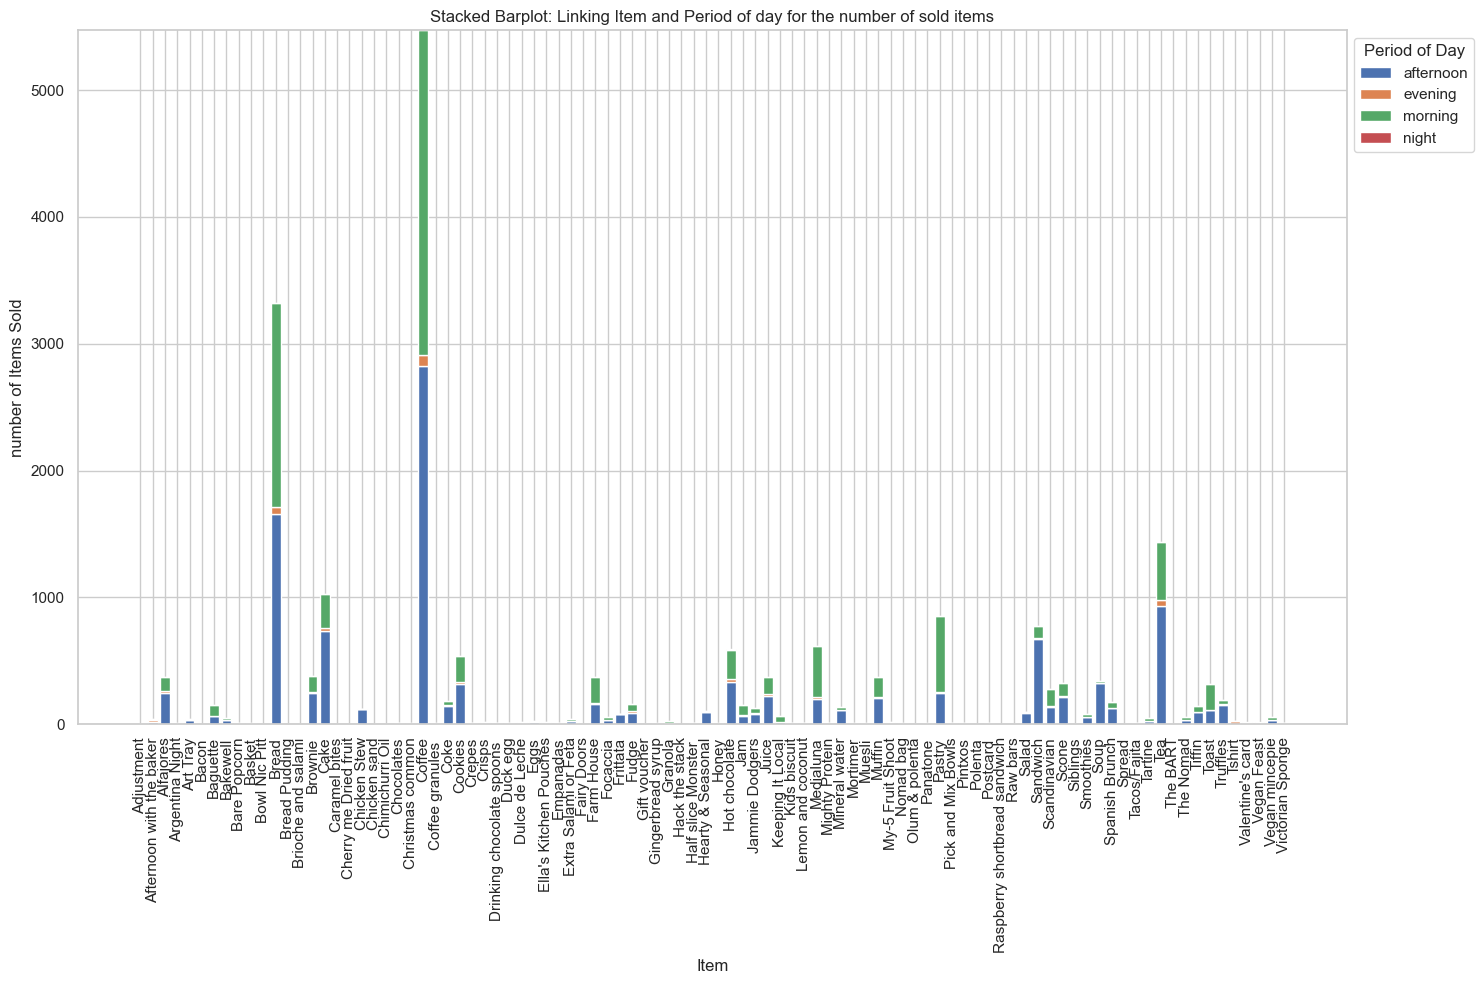

In [196]:
grouped = grouped_by_item_daytime.groupby(['Item', 'period_day']).sum().reset_index()
pivot = grouped.pivot(index='Item', columns='period_day', values='count').fillna(0)

fig, ax = plt.subplots(figsize=(15, 10))
bottom = np.zeros(len(pivot))

for value in pivot.columns:
    ax.bar(pivot.index, pivot[value], label=value, bottom=bottom)
    bottom += pivot[value]



plt.title('Stacked Barplot: Linking Item and Period of day for the number of sold items')
plt.xlabel('Item')
plt.ylabel('number of Items Sold')
plt.xticks(rotation=90)
plt.legend(title='Period of Day', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [115]:
grouped_by_item_daytime = grouped_by_item_daytime.sort_values(by='count', ascending=False)

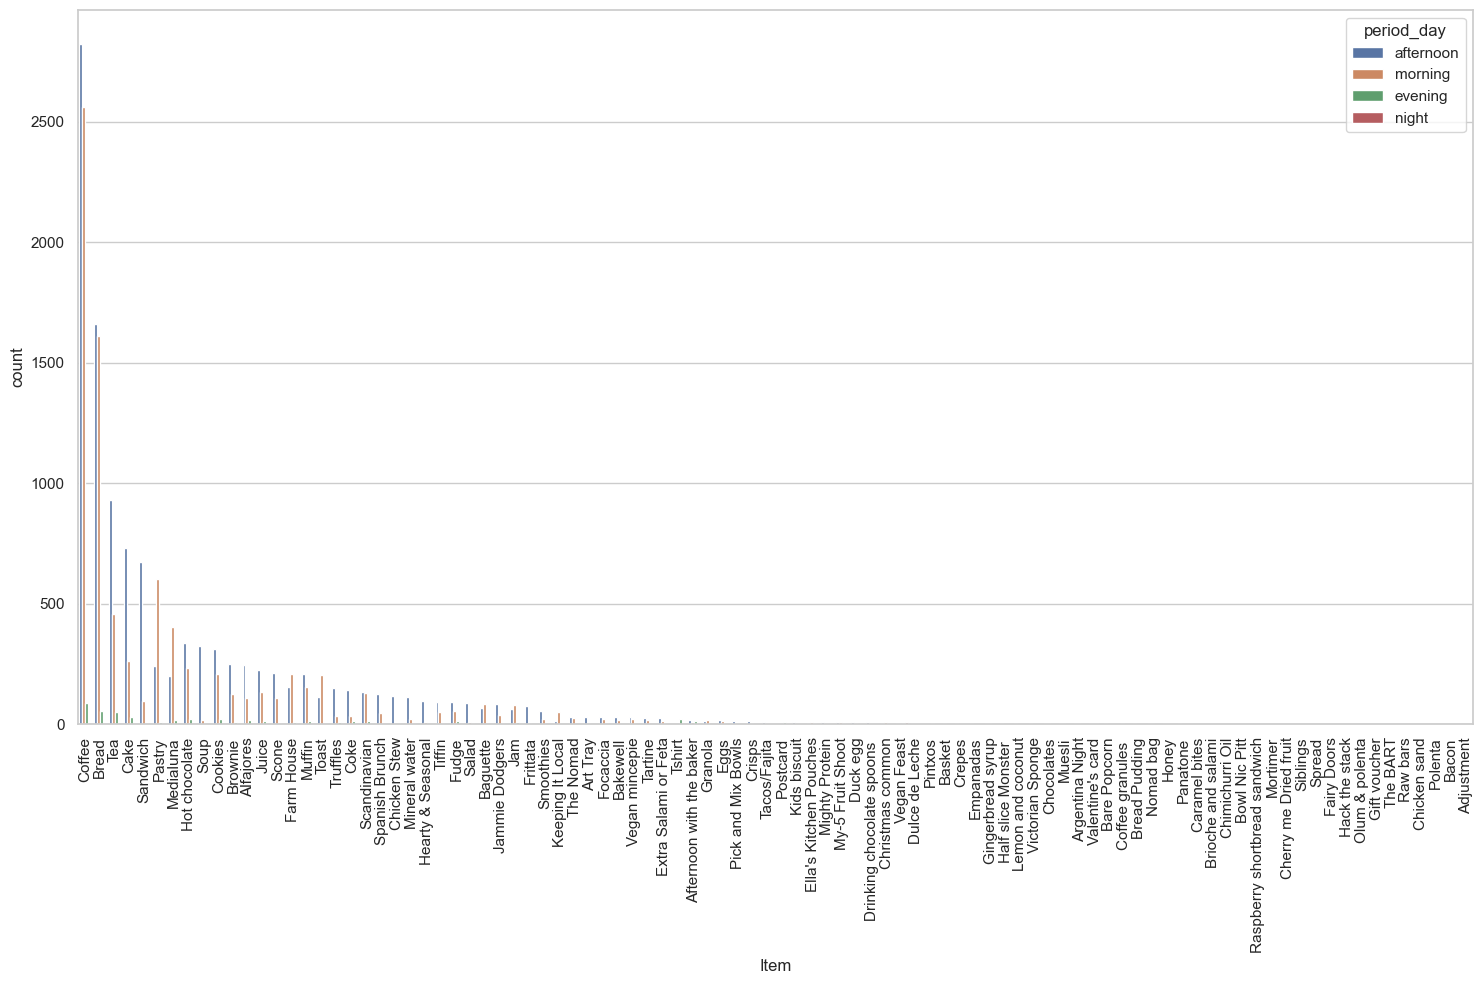

In [151]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))

# Create a barplot with 'item' on x-axis, 'count' on y-axis, and 'category' as hue
sns.barplot(x='Item', y='count', hue='period_day', data=grouped_by_item_daytime)

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Implement K-Means clustering for customer segmentation based on purchasing behavior

In [123]:
bakery_df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
2,2,Scandinavian,10/30/2016 10:05,morning,weekend
3,3,Hot chocolate,10/30/2016 10:07,morning,weekend
4,3,Jam,10/30/2016 10:07,morning,weekend


In [125]:
customer_df = bakery_df.groupby("Transaction").agg({
    "Item": "nunique",      #Item Variety
    "date_time": "count",   #Total_Purchases
    "period_day": lambda x: x.value_counts().to_dict(),
    "weekday_weekend": lambda x: x.value_counts().to_dict()
}).reset_index()

customer_df.columns = ['Transaction', 'Item_Variety', 'Total_Purchases', 'Period_Counts', 'Weekday_Weekend_Counts']



In [126]:
customer_df.head()

,Transaction,Item_Variety,Total_Purchases,Period_Counts,Weekday_Weekend_Counts
0,1,1,1,{'morning': 1},{'weekend': 1}
1,2,1,2,{'morning': 2},{'weekend': 2}
2,3,3,3,{'morning': 3},{'weekend': 3}
3,4,1,1,{'morning': 1},{'weekend': 1}
4,5,3,3,{'morning': 3},{'weekend': 3}


In [127]:
customer_df = pd.concat([customer_df.drop(["Period_Counts", "Weekday_Weekend_Counts"], axis= 1),
                        customer_df["Period_Counts"].apply(pd.Series),
                        customer_df["Weekday_Weekend_Counts"].apply(pd.Series)], axis=1)
customer_df.fillna(0, inplace=True)

In [128]:
customer_df.head()

,Transaction,Item_Variety,Total_Purchases,morning,afternoon,evening,night,weekend,weekday
0,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0
1,2,1,2,2.0,0.0,0.0,0.0,2.0,0.0
2,3,3,3,3.0,0.0,0.0,0.0,3.0,0.0
3,4,1,1,1.0,0.0,0.0,0.0,1.0,0.0
4,5,3,3,3.0,0.0,0.0,0.0,3.0,0.0


### Scaling the feature


In [129]:
scaler = StandardScaler()
X = scaler.fit_transform(customer_df.drop('Transaction', axis=1))

### Determine optimal number of clusters


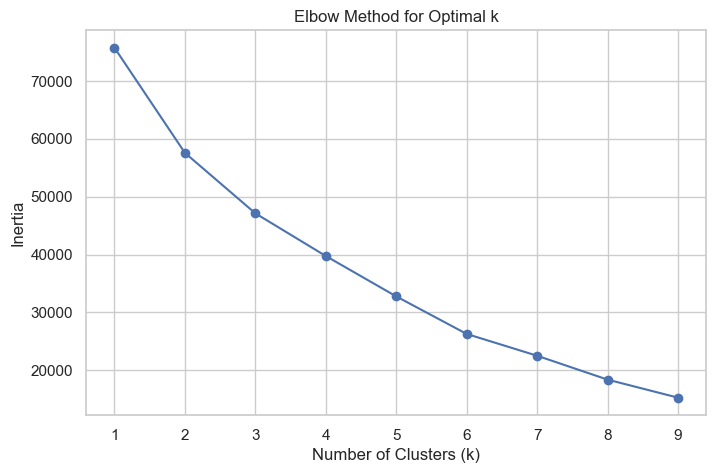

In [132]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [133]:
inertia

[75720.0000000004,
 57560.873891613526,
 47113.39795886654,
 39745.38127110113,
 32768.58711221031,
 26285.257794100547,
 22520.91710524427,
 18395.98279414598,
 15282.063822416814]

## Apply k_means clustering


In [134]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(X)

In [135]:
customer_df.head()

,Transaction,Item_Variety,Total_Purchases,morning,afternoon,evening,night,weekend,weekday,Cluster
0,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0
1,2,1,2,2.0,0.0,0.0,0.0,2.0,0.0,0
2,3,3,3,3.0,0.0,0.0,0.0,3.0,0.0,1
3,4,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0
4,5,3,3,3.0,0.0,0.0,0.0,3.0,0.0,1


## Summary of clusters


In [136]:
print(customer_df.groupby('Cluster').mean())



         Transaction  Item_Variety  Total_Purchases   morning  afternoon  \
Cluster                                                                    
0        4748.571581      1.397708         1.446142  0.653476   0.749427   
1        5185.293245      3.410214         3.855848  1.536244   2.266063   
2        4995.930832      3.281946         3.728605  1.325909   2.293669   

          evening     night   weekend   weekday  
Cluster                                          
0        0.041100  0.002139  0.461268  0.984874  
1        0.053542  0.000000  3.855848  0.000000  
2        0.109027  0.000000  0.000000  3.728605  


## Plot clusters to visualize customer segments


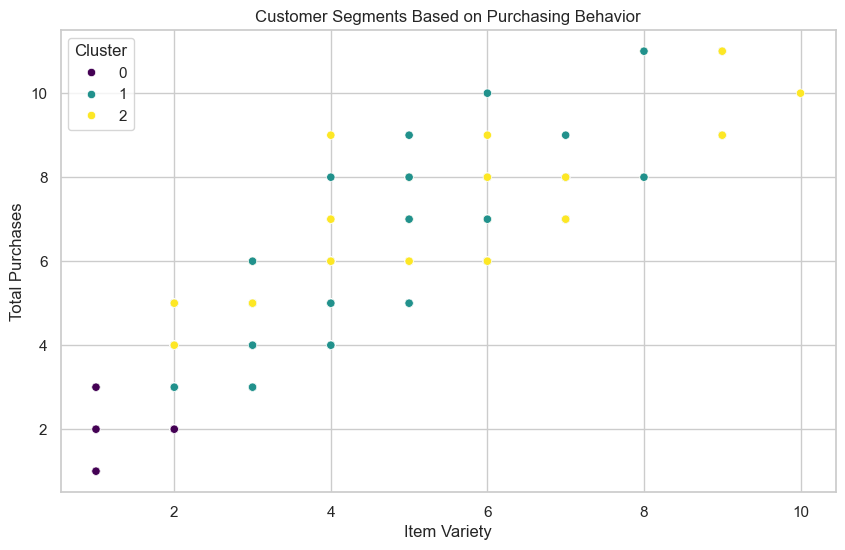

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Variety', y='Total_Purchases', hue='Cluster', data=customer_df, palette='viridis')
plt.title('Customer Segments Based on Purchasing Behavior')
plt.xlabel('Item Variety')
plt.ylabel('Total Purchases')
plt.show()

Cluster 0: Customers in this cluster show low overall activity and a limited variety of items purchased. They tend to buy mainly in the afternoon and slightly more on weekdays.

Cluster 1: This group has the highest item variety and total purchases, buying mostly in the afternoon and spreading their purchases across both weekends and weekdays.

Cluster 2: Customers in this segment make their purchases exclusively in the morning and slightly favor weekdays over weekends.


These insights can help identify target customer groups for marketing strategies or operational adjustments based on the time of day or day of the week when they’re most active.

In [246]:
bakery_df.head(2)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend


## Creating a Recommendation system, I clustered customers into three distinct groups to target our advertising based on their purchasing behavior.

In [163]:
# Creating a user-item matrix for Collaborative Filtering
user_item_matrix = bakery_df.pivot_table(index='Transaction', columns='Item', aggfunc='size', fill_value=0)

# Running a clustering model, KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
customer_clusters = kmeans.fit_predict(user_item_matrix)

# Creating customer_features DataFrame
customer_features = pd.DataFrame({
    'Transaction': user_item_matrix.index,
    'Cluster': customer_clusters
})

# Function for recommending items using Collaborative Filtering
def get_recommendations(transaction_id, num_recommendations=5):
    # Customer's cluster
    customer_cluster = customer_features[customer_features['Transaction'] == transaction_id]['Cluster'].values[0]

    # Filtering customers within the same cluster
    same_cluster_customers = customer_features[customer_features['Cluster'] == customer_cluster]['Transaction']
    cluster_matrix = user_item_matrix.loc[same_cluster_customers]

    # Fit Nearest Neighbors model for Collaborative Filtering
    knn = NearestNeighbors(metric='cosine', algorithm='brute')
    knn.fit(cluster_matrix)

    # Find nearest neighbors for the specific customer
    distances, indices = knn.kneighbors(cluster_matrix.loc[[transaction_id]], n_neighbors=num_recommendations+1)
    recommended_items = []

    for i in range(1, len(distances.flatten())):  # Skip first index (itself)
        similar_customer = cluster_matrix.index[indices.flatten()[i]]
        recommended_items.extend(cluster_matrix.loc[similar_customer][cluster_matrix.loc[similar_customer] > 0].index)

    # Return unique recommendations
    return list(set(recommended_items))

# Example of getting recommendations for a specific customer
transaction_id = 4806  # Example transaction ID
recommendations = get_recommendations(transaction_id, num_recommendations=5)
print(f"Recommended items for customer {transaction_id}: {recommendations}")

# Marketing Strategy Development Based on Segments
def marketing_strategy(cluster_id):
    if cluster_id == 0:
        return "Promote weekday afternoon bundles with low-item variety"
    elif cluster_id == 1:
        return "Offer personalized discounts on high-variety products on weekends and weekdays"
    elif cluster_id == 2:
        return "Target with weekday morning offers on high-frequency items"

# Assign a marketing strategy to each cluster
customer_features['Marketing_Strategy'] = customer_features['Cluster'].apply(marketing_strategy)

# Display marketing strategies per cluster
print(customer_features[['Transaction', 'Cluster', 'Marketing_Strategy']])

Recommended items for customer 4806: ['Coffee']
      Transaction  Cluster                                 Marketing_Strategy
0               1        0  Promote weekday afternoon bundles with low-ite...
1               2        2  Target with weekday morning offers on high-fre...
2               3        2  Target with weekday morning offers on high-fre...
3               4        2  Target with weekday morning offers on high-fre...
4               5        0  Promote weekday afternoon bundles with low-ite...
...           ...      ...                                                ...
9460         9680        0  Promote weekday afternoon bundles with low-ite...
9461         9681        2  Target with weekday morning offers on high-fre...
9462         9682        1  Offer personalized discounts on high-variety p...
9463         9683        1  Offer personalized discounts on high-variety p...
9464         9684        2  Target with weekday morning offers on high-fre...

[9465 rows x 3 

Project Summary: Bakery Sales and Customer Segmentation Analysis

In this project, I performed an in-depth analysis of a bakery’s sales data, focusing on data cleaning, exploratory analysis, clustering, and building a recommendation system. My approach utilized a range of data manipulation, visualization, and machine learning techniques, highlighting my skills in data wrangling, feature engineering, and clustering analysis. Here is a summary of the key steps:

	1.	Data Cleaning and Preprocessing:
	•	Loaded the dataset using pandas and cleaned column names for accessibility.
	•	Standardized text data by converting column values to lowercase, making them uniform and easier to read.
	•	Formatted the date_time column to a desired date format and handled missing values and duplicates, ensuring a clean dataset.
	•	Reset the index for improved data accessibility and readability.
	2.	Exploratory Data Analysis (EDA):
	•	Analyzed the busiest and most profitable periods of the day, using sales data to identify peak hours for the bakery.
	•	Conducted an analysis on weekday vs. weekend performance to understand customer behavior based on the day of the week.
	•	Used item frequency analysis to identify the most popular products.
	•	Created a product_id column from product_name for better handling of product references in calculations.
	•	Applied label encoding to explore potential correlations between columns and checked for variance to understand data dispersion.
	•	Visualized insights using seaborn and matplotlib, including bar charts for item sales by time period and box plots to detect outliers.
	3.	Customer Segmentation Using K-Means Clustering:
	•	Grouped data by item and daytime to analyze item sales patterns across different periods of the day.
	•	Created a stacked bar plot to visualize item sales distribution across different periods.
	•	Implemented the K-Means algorithm for customer segmentation, applying the elbow method to determine the optimal number of clusters.
	•	Segmented customers into three clusters based on purchasing behavior, enabling targeted marketing strategies.
	4.	Recommendation System:
	•	Developed a recommendation system using collaborative filtering, clustering customers to offer personalized recommendations based on purchasing patterns.
	•	Segmented customers into three groups to enable targeted advertising based on their specific purchasing behaviors.
	5.	Libraries and Tools:
	•	Utilized a diverse set of Python libraries, including:
	•	pandas for data manipulation,
	•	seaborn and matplotlib for data visualization,
	•	numpy for numerical operations,
	•	sklearn for clustering (K-Means) and recommendation modeling (Nearest Neighbors).

This project demonstrates my ability to handle the end-to-end data analysis process, from data cleaning and exploration to advanced analytics, including customer segmentation and recommendation systems. By leveraging these techniques, I provided actionable insights that could help the bakery optimize sales strategies and enhance customer engagement through targeted marketing.